importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('Fish_dataset (1).csv') ## import dataset

In [6]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


##  Basic Information about the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


data.info() - gives the basic information about the given dataset, from this we can infer the data types of the features and number of non-null values

In [8]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


data.describe() - gives the descriptive statistics of the given dataset,like(Standard Deviation, Mean, Count, Min, Max, 25%, 75%, 50%(nothing but median)) 

#### Checking for any Missing Values

In [9]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In the given dataset, we didn't have any null values to treat.

Perch        35.22
Bream        22.01
Roach        12.58
Pike         10.69
Smelt         8.81
Parkki        6.92
Whitefish     3.77
Name: Species, dtype: float64


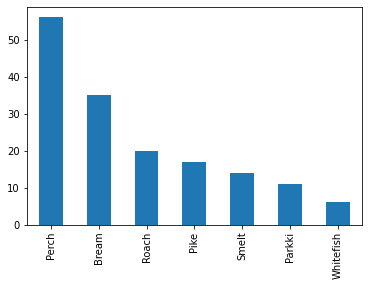

In [10]:
print(round(data.Species.value_counts(normalize = True) * 100, 2))
data.Species.value_counts().plot.bar();

<AxesSubplot:>

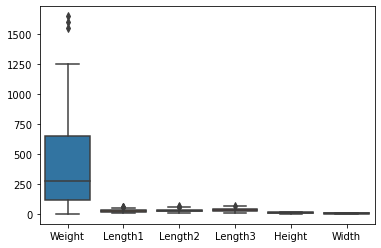

In [11]:
sns.boxplot(data = data)

From the above graph, I can conclude the data is impure and contains outlier values, that need to be treated.

In [12]:
# By Statistical Way

def outlier(a):
    mean = a.mean()
    std = a.std()
    print('Mean: ',mean)
    print('Standard Deviation: ',std)
    Outlier = []
    for i in a:
        z = (i-mean)/std
        if z >3:
            Outlier.append(i)
    print('Outlier: ', Outlier)

In [13]:
for i in data.select_dtypes('float64'):
    print(i,'Outlier Inference')
    outlier(data[i])
    print('\n')

Weight Outlier Inference
Mean:  398.3264150943396
Standard Deviation:  357.9783165508931
Outlier:  [1600.0, 1550.0, 1650.0]


Length1 Outlier Inference
Mean:  26.24716981132075
Standard Deviation:  9.996441210553128
Outlier:  [59.0]


Length2 Outlier Inference
Mean:  28.415723270440253
Standard Deviation:  10.716328098884247
Outlier:  [63.4]


Length3 Outlier Inference
Mean:  31.227044025157248
Standard Deviation:  11.610245832690964
Outlier:  [68.0]


Height Outlier Inference
Mean:  8.970993710691822
Standard Deviation:  4.286207619968867
Outlier:  []


Width Outlier Inference
Mean:  4.417485534591194
Standard Deviation:  1.6858038699921671
Outlier:  []




Features like Weight, Length1, Length2, Length3 contains of outlier Values.

In [14]:
data = data[~(data['Weight'] >= 1550)]

In [15]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [16]:
# Checking for Outlier values into the dataset

for i in data.select_dtypes('float64'):
    print(i,'Outlier Inference')
    outlier(data[i])
    print('\n')

Weight Outlier Inference
Mean:  375.21730769230766
Standard Deviation:  319.54697815328853
Outlier:  []


Length1 Outlier Inference
Mean:  25.65576923076923
Standard Deviation:  9.119629593387854
Outlier:  []


Length2 Outlier Inference
Mean:  27.786538461538466
Standard Deviation:  9.792650875337744
Outlier:  []


Length3 Outlier Inference
Mean:  30.57115384615386
Standard Deviation:  10.695359316924055
Outlier:  []


Height Outlier Inference
Mean:  8.951128205128205
Standard Deviation:  4.324324899580838
Outlier:  []


Width Outlier Inference
Mean:  4.37571923076923
Standard Deviation:  1.6721877717187912
Outlier:  []




<AxesSubplot:>

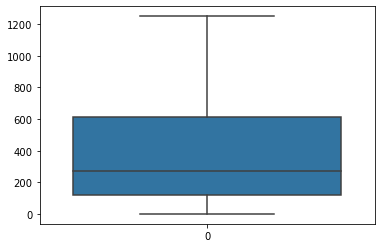

In [17]:
sns.boxplot(data = data['Weight'])

Outlier Values in the Weight column is removed

### Univariate Outlier Analysis

<AxesSubplot:xlabel='Species', ylabel='Weight'>

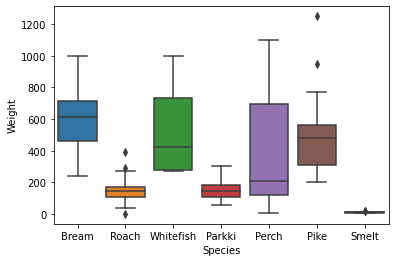

In [18]:
sns.boxplot(data= data, x = 'Species',y = 'Weight')

<AxesSubplot:xlabel='Species', ylabel='Length1'>

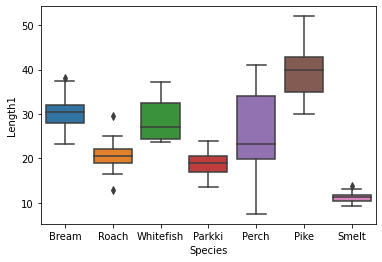

In [19]:
sns.boxplot(data =data, x = 'Species', y = 'Length1')

<AxesSubplot:xlabel='Species', ylabel='Length2'>

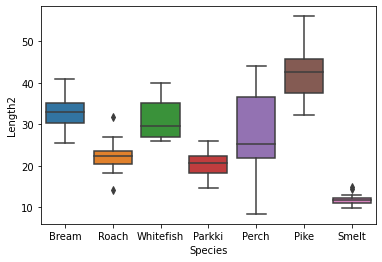

In [20]:
sns.boxplot(data = data, x = 'Species', y = 'Length2')

<AxesSubplot:xlabel='Species', ylabel='Length3'>

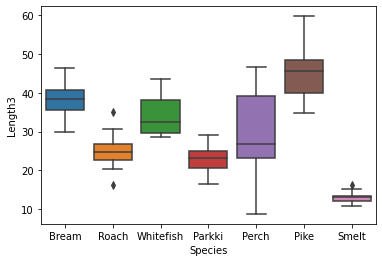

In [21]:
sns.boxplot(data = data, x = 'Species', y = 'Length3')

<AxesSubplot:xlabel='Species', ylabel='Height'>

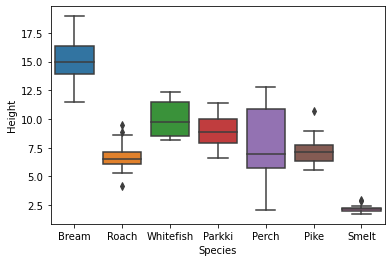

In [22]:
sns.boxplot(data = data, x = 'Species', y = 'Height')

<AxesSubplot:xlabel='Species', ylabel='Width'>

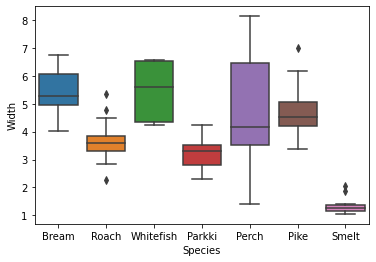

In [23]:
sns.boxplot(data = data,x = 'Species', y = data['Width'])

In [24]:
roach = data[data['Species'] == 'Roach']
roach

,Species,Weight,Length1,Length2,Length3,Height,Width
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680
36,Roach,69.0,16.5,18.2,20.3,5.2983,2.8217
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
41,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943
43,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
44,Roach,145.0,20.5,22.0,24.3,6.6339,3.5478


In [25]:
q1_roach = roach['Weight'].quantile(0.25)
q3_roach = roach['Weight'].quantile(0.75)

iqr_roach = q3_roach - q1_roach

print((q1_roach - (1.5 * iqr_roach)), (q3_roach + (1.5 * iqr_roach)))

3.0 273.0


In [26]:
outlier_roach = roach.Weight[(roach.Weight < 3.0) | (roach.Weight > 273.0)]
outlier_roach

40      0.0
52    290.0
54    390.0
Name: Weight, dtype: float64

In [27]:
data = data.drop([40,52,54], axis = 0)

In [28]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [29]:
pike = data[data['Species'] == 'Pike']
pike

,Species,Weight,Length1,Length2,Length3,Height,Width
128,Pike,200.0,30.0,32.3,34.8,5.5680,3.3756
129,Pike,300.0,31.7,34.0,37.8,5.7078,4.1580
130,Pike,300.0,32.7,35.0,38.8,5.9364,4.3844
131,Pike,300.0,34.8,37.3,39.8,6.2884,4.0198
132,Pike,430.0,35.5,38.0,40.5,7.2900,4.5765
133,Pike,345.0,36.0,38.5,41.0,6.3960,3.9770
134,Pike,456.0,40.0,42.5,45.5,7.2800,4.3225
135,Pike,510.0,40.0,42.5,45.5,6.8250,4.4590
136,Pike,540.0,40.1,43.0,45.8,7.7860,5.1296
137,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960


In [30]:
q1_pike = pike['Weight'].quantile(0.25)
q3_pike = pike['Weight'].quantile(0.75)

iqr_pike = q3_pike - q1_pike

(q1_pike - (1.5 * iqr_pike), (q3_pike + (1.5 * iqr_pike)))

(-62.25, 933.75)

In [31]:
outlier_pike = pike.Weight[(pike.Weight < 0) | (pike.Weight > 933.0)]
outlier_pike

140     950.0
141    1250.0
Name: Weight, dtype: float64

In [32]:
data = data.drop([140,141], axis = 0)

In [33]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [34]:
smelt = data[data['Species'] == 'Smelt']
smelt

,Species,Weight,Length1,Length2,Length3,Height,Width
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
148,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936


In [35]:
q1_smelt = smelt['Weight'].quantile(0.25)
q3_smelt = smelt['Weight'].quantile(0.75)

iqr_smelt = q3_smelt - q1_smelt

(q1_smelt - (1.5 * iqr_smelt), (q3_smelt + (1.5 * iqr_smelt)))

(4.074999999999999, 17.075)

In [36]:
smelt.Weight[(smelt['Weight'] < 4.079) | (smelt['Weight'] > 17.075)]

157    19.7
158    19.9
Name: Weight, dtype: float64

In [37]:
data = data.drop([157, 158], axis = 0)

In [38]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690


<AxesSubplot:xlabel='Species', ylabel='Weight'>

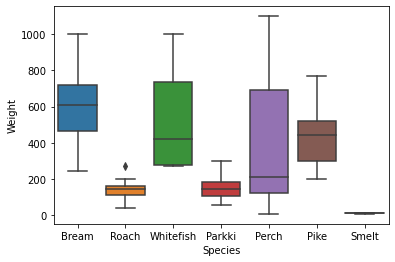

In [39]:
sns.boxplot(data = data, x = 'Species', y= 'Weight')

Here in Roach Species, still there is an outlier but when I calculated for (q3 - 1.5(IQR)) I got a value of 273.0 but the actual value in that column is 272.0. Hence I didn't remove that one because even it was look like a outlier in boxplot, but it may be a valid data according to the calculation.

### Data Preprocessing - Encoding
Here the species Column contains of Category, have to be treated with Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
data['Species'] = enc.fit_transform(data['Species'])
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
152,5,9.9,11.3,11.8,13.1,2.2139,1.1659
153,5,9.8,11.4,12.0,13.2,2.2044,1.1484
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690


To check the Category is Ordinal or Nominal, for that we have test like Wilcoxon_Sign Test

In [41]:
data['Species'] = data["Species"].astype('category')
data["Species"].dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6], ordered=False)

### Seperating Independent and Dependent Variable

In [42]:
x = data.drop(['Weight'], axis = 1)
y = data.Weight

### Linearity

<AxesSubplot:>

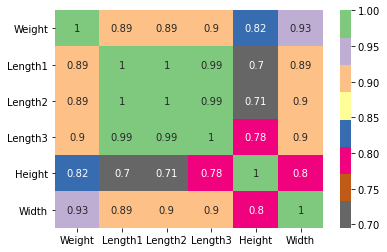

In [43]:
# Check for correlation is Significant or not

sns.heatmap(data.corr(), annot = True, cmap = 'Accent_r')

From the Heatmap, we can infer about the Correlation Level of Various Independent Features with Dependent Feature, how strong the relationship between them is explained. From the given dataset, I assume that Weight is the Dependent Feature. By this I can conclude that 'Length1' , 'Length2' , 'Length3' , and 'Width' (Higher Correalation with 'Weight'), whereas 'Height' is least significant when compared with Significance of other Features.




#### Statistical test 

To check the level of Significance of the Features, we have test called Pearsonr, gives the significance level of various Independent Features with Dependent Feature

In [44]:
from scipy.stats import pearsonr

for i in x.columns:
    a, b = pearsonr(x[i], y)
    print('\n',i,'Vs Weight(Dependent Variable)')
    if b > 0.05:
        print('Not Significant Linear relationship between' ,i, '& Weight(Dependent Variable)')
    else:
        print('Significant relationship between',i, '& weight(Dependent Variable)')


 Species Vs Weight(Dependent Variable)
Significant relationship between Species & weight(Dependent Variable)

 Length1 Vs Weight(Dependent Variable)
Significant relationship between Length1 & weight(Dependent Variable)

 Length2 Vs Weight(Dependent Variable)
Significant relationship between Length2 & weight(Dependent Variable)

 Length3 Vs Weight(Dependent Variable)
Significant relationship between Length3 & weight(Dependent Variable)

 Height Vs Weight(Dependent Variable)
Significant relationship between Height & weight(Dependent Variable)

 Width Vs Weight(Dependent Variable)
Significant relationship between Width & weight(Dependent Variable)


### Normality Check

#### Graphical Method

<AxesSubplot:xlabel='Weight', ylabel='Density'>

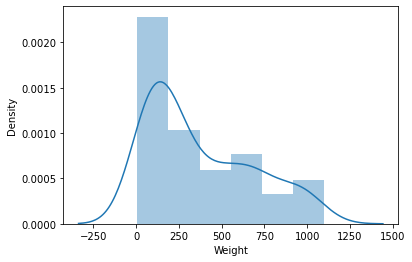

In [45]:
sns.distplot(data['Weight'])

#### Statistical test to prove Normality of Dependent Variable

* Shapiro Wilk Test for checking the Normality of Dependent Variable

The null hypothesis of the Shapiro-Wilk test is that your data's distribution is equal to a normal distribution and the alternative hypothesis is that your data's distribution is not equal to a normal distribution.

In [46]:
from scipy.stats import shapiro

sha = shapiro(y)

if sha.pvalue > 0.05:
    print('Dependent Feature is Normally Distributed')

else:
    print('Dependent Feature is Not Normally Distributed')

Dependent Feature is Not Normally Distributed


We have to accept the Alternative Hypothesis. Hence the data's Dependent Feature is not Normally Distributed

### Multicolinearity

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_data = pd.DataFrame()
vif_data['Features'] = x.iloc[:,1:].columns

vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.iloc[:,1:].columns))]

vif_data

,Features,VIF
0,Length1,2.998980
1,Length2,11282.304728
2,Length3,15077.158306
3,Height,3502.174397
4,Width,105.879671


From this above table, we can infer that length1, length2, length3 is highly significant with other Independent Features.

## Building model using Linear regression

#### Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((119, 6), (119,), (30, 6), (30,))

#### Model Building

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

#### Model Prediction

In [50]:
pred_test = model.predict(x_test)
pred_train = model.predict(x_train)

#### Evaluation Metrics

In [51]:
from sklearn.metrics import mean_squared_error as mse, r2_score

def eval_metrics(a, b):
    error = mse(a,b)
    print('MSE Error: ', error)
    print('RMSE Error: ', np.sqrt(error))

In [52]:
eval_metrics(y_test, pred_test), eval_metrics(y_train, pred_train)

MSE Error:  6908.124422994153
RMSE Error:  83.11512752197493
MSE Error:  7909.870517233015
RMSE Error:  88.93745283755891


(None, None)

In [53]:
print('Train R2 Score: ',r2_score(y_train, pred_train) *100)
print('Test R2 Score: ',r2_score(y_test, pred_test)*100)

Train R2 Score:  92.12546636598047
Test R2 Score:  90.35602555285314


Train and Test R2 score is given above, Train R2 score( 92% ), whereas Test is ( 91% ). The model undergoes Overfitting Problem  because it learns too much of information from Training

#### Checking for Intercept and Coefficient values

In [54]:
print('Intercept: ', model.intercept_)
print('\nCoefficient Values: ')
for a,b in zip(x.columns, model.coef_):
    print('>', a,':', b)

Intercept:  -502.6333555535755

Coefficient Values: 
> Species : 26.46157296810263
> Length1 : 104.96551687507257
> Length2 : -31.036991524377672
> Length3 : -55.75043269055819
> Height : 54.93616903617725
> Width : 45.859198175969475


In [55]:
import statsmodels.api as sm

print(sm.OLS(y_train, sm.add_constant(x_train)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     218.4
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           2.17e-59
Time:                        15:43:16   Log-Likelihood:                -702.92
No. Observations:                 119   AIC:                             1420.
Df Residuals:                     112   BIC:                             1439.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -502.6334     42.601    -11.799      0.0

Durbin-Watson score - 1.914, Hence No Auto Correlation

R-Squared - gives the values how good the model's regression line is fitted, by considering all the features even if it was not significant 

Adj. R-Sqaured - is similar to R-Squared, by considering the most important Features. The value is always close to R-Squared


From the Summary Report: 

Length2 is no significant linear relationship between Lenght2 and Dependent Feature ('Weight')

T-Test and Z-Test !

z-test - compare the mean of two is similar or not.

In [56]:
from statsmodels.stats.weightstats import ztest

ztest(y)

(14.642031721175083, 1.5147329237158093e-48)

In [57]:
test_table = pd.DataFrame({'Actual':y_test, 'Predicted':pred_test, 'Error': (y_test - pred_test)})
train_table = pd.DataFrame({'Actual':y_train, 'Predicted':pred_train, 'Error': (y_train - pred_train)})

test_table

,Actual,Predicted,Error
63,90.0,110.947781,-20.947781
145,6.7,-156.848267,163.548267
6,500.0,486.289107,13.710893
93,145.0,162.890702,-17.890702
87,120.0,128.144813,-8.144813
29,1000.0,834.607583,165.392417
4,430.0,402.432187,27.567813
91,130.0,153.640133,-23.640133
11,500.0,539.867933,-39.867933
147,7.0,-138.254522,145.254522


In [58]:
train_table

,Actual,Predicted,Error
55,270.0,381.501684,-111.501684
67,170.0,254.875729,-84.875729
48,169.0,240.945011,-71.945011
23,680.0,616.437835,63.562165
21,685.0,677.518552,7.481448
...,...,...,...
1,290.0,343.907426,-53.907426
80,85.0,72.247232,12.752768
50,200.0,295.091900,-95.091900
117,650.0,750.115480,-100.115480


In [59]:
def graph(a,b):
    ad = pd.DataFrame({'Actual': a, 'Predicted': b})
    ad.plot.bar(figsize = (20,8))
    plt.legend(loc = 'best')

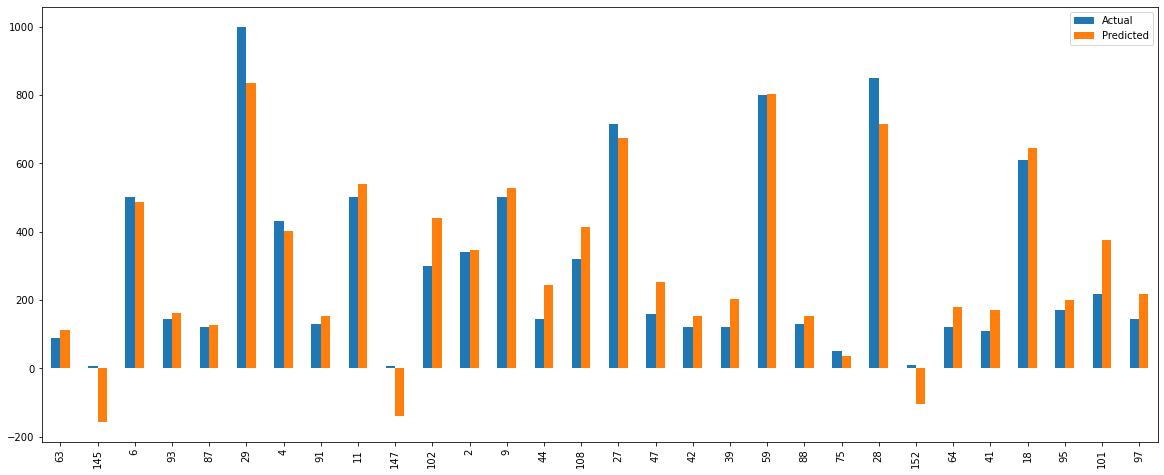

In [60]:
graph(y_test, pred_test)

#### Conclusion:

The graph gives the information about the Testing Actual and Predicted performance. The model performs not so bad, when the Actual values are low the predicted value is way under performed. But it tried hard to match the Actual Value. By adjusting the Regression line, we can earn better performance model

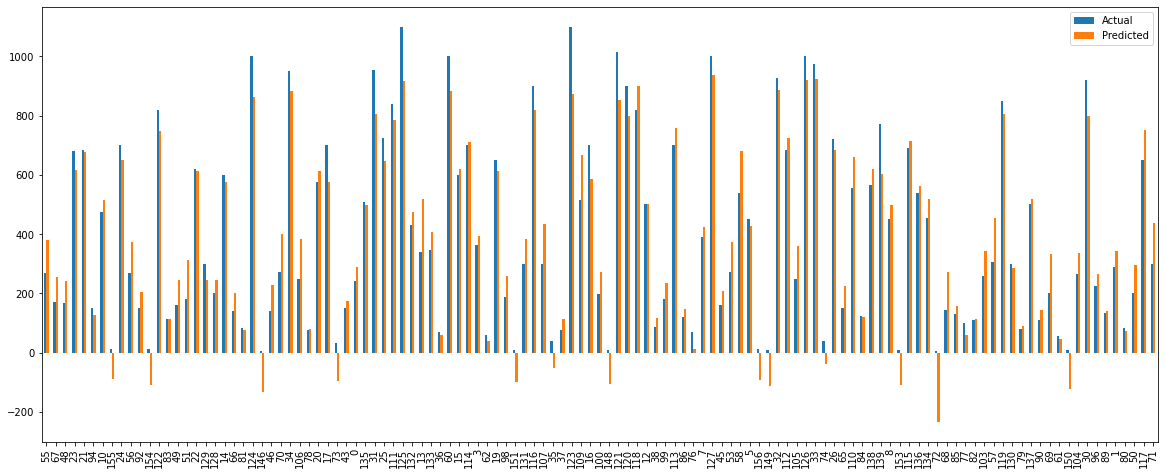

In [61]:
graph(y_train, pred_train)